In [10]:
import pandas as pd
from utils import plot_pacfs ,plot_acfs

In [11]:
df = pd.read_csv("all_coins_data.csv")
df.head()

,time,high,low,open,volumefrom,volumeto,close,conversion_type,conversion_symbol,coin,daily_return_pct,intraday_return,daily_log_return
0,2020-08-22,0.1262,0.1183,0.1229,84207229.64,10373929.94,0.1253,direct,NaN,ADA,0.019528,0.019528,0.019340
1,2020-08-23,0.1259,0.1195,0.1253,64772529.12,7945897.18,0.1215,direct,NaN,ADA,-0.030327,-0.030327,-0.030797
2,2020-08-24,0.1270,0.1201,0.1215,77809944.45,9662533.63,0.1237,direct,NaN,ADA,0.018107,0.018107,0.017945
3,2020-08-25,0.1238,0.1063,0.1237,65939158.71,7699604.99,0.1126,direct,NaN,ADA,-0.089733,-0.089733,-0.094018
4,2020-08-26,0.1183,0.1107,0.1126,21686624.36,2483949.36,0.1144,direct,NaN,ADA,0.015986,0.015986,0.015859


In [12]:
df.sort_values(["coin", "time"], inplace = True)
df = df[["time","close", "coin"]]

In [13]:
coins = df["coin"].drop_duplicates().tolist()
df.head()

,time,close,coin
0,2020-08-22,0.1253,ADA
1,2020-08-23,0.1215,ADA
2,2020-08-24,0.1237,ADA
3,2020-08-25,0.1126,ADA
4,2020-08-26,0.1144,ADA


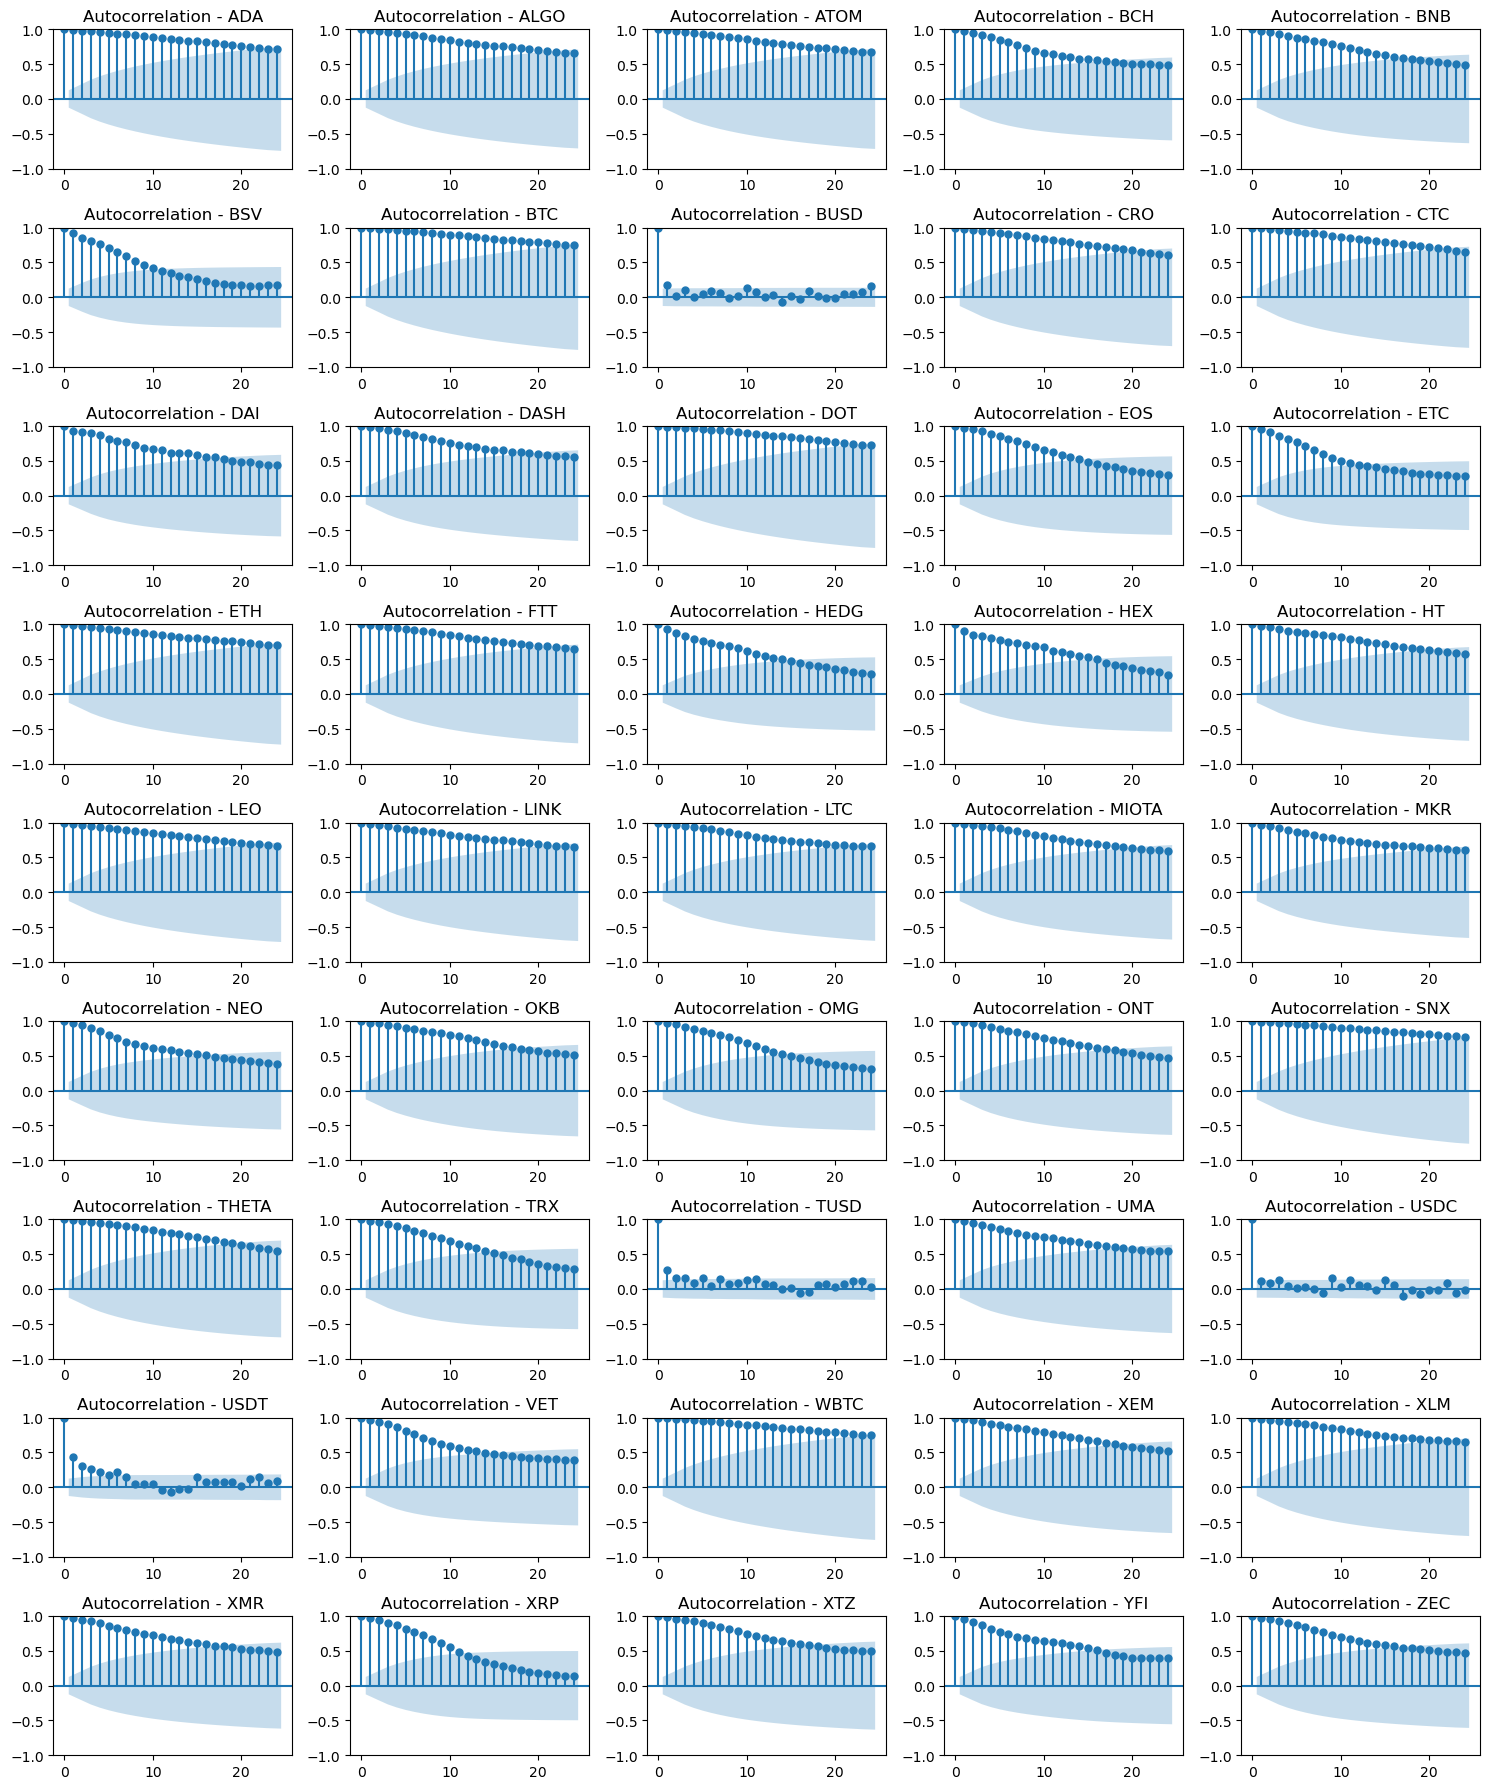

In [14]:
plot_acfs(df, coins, 9,5)

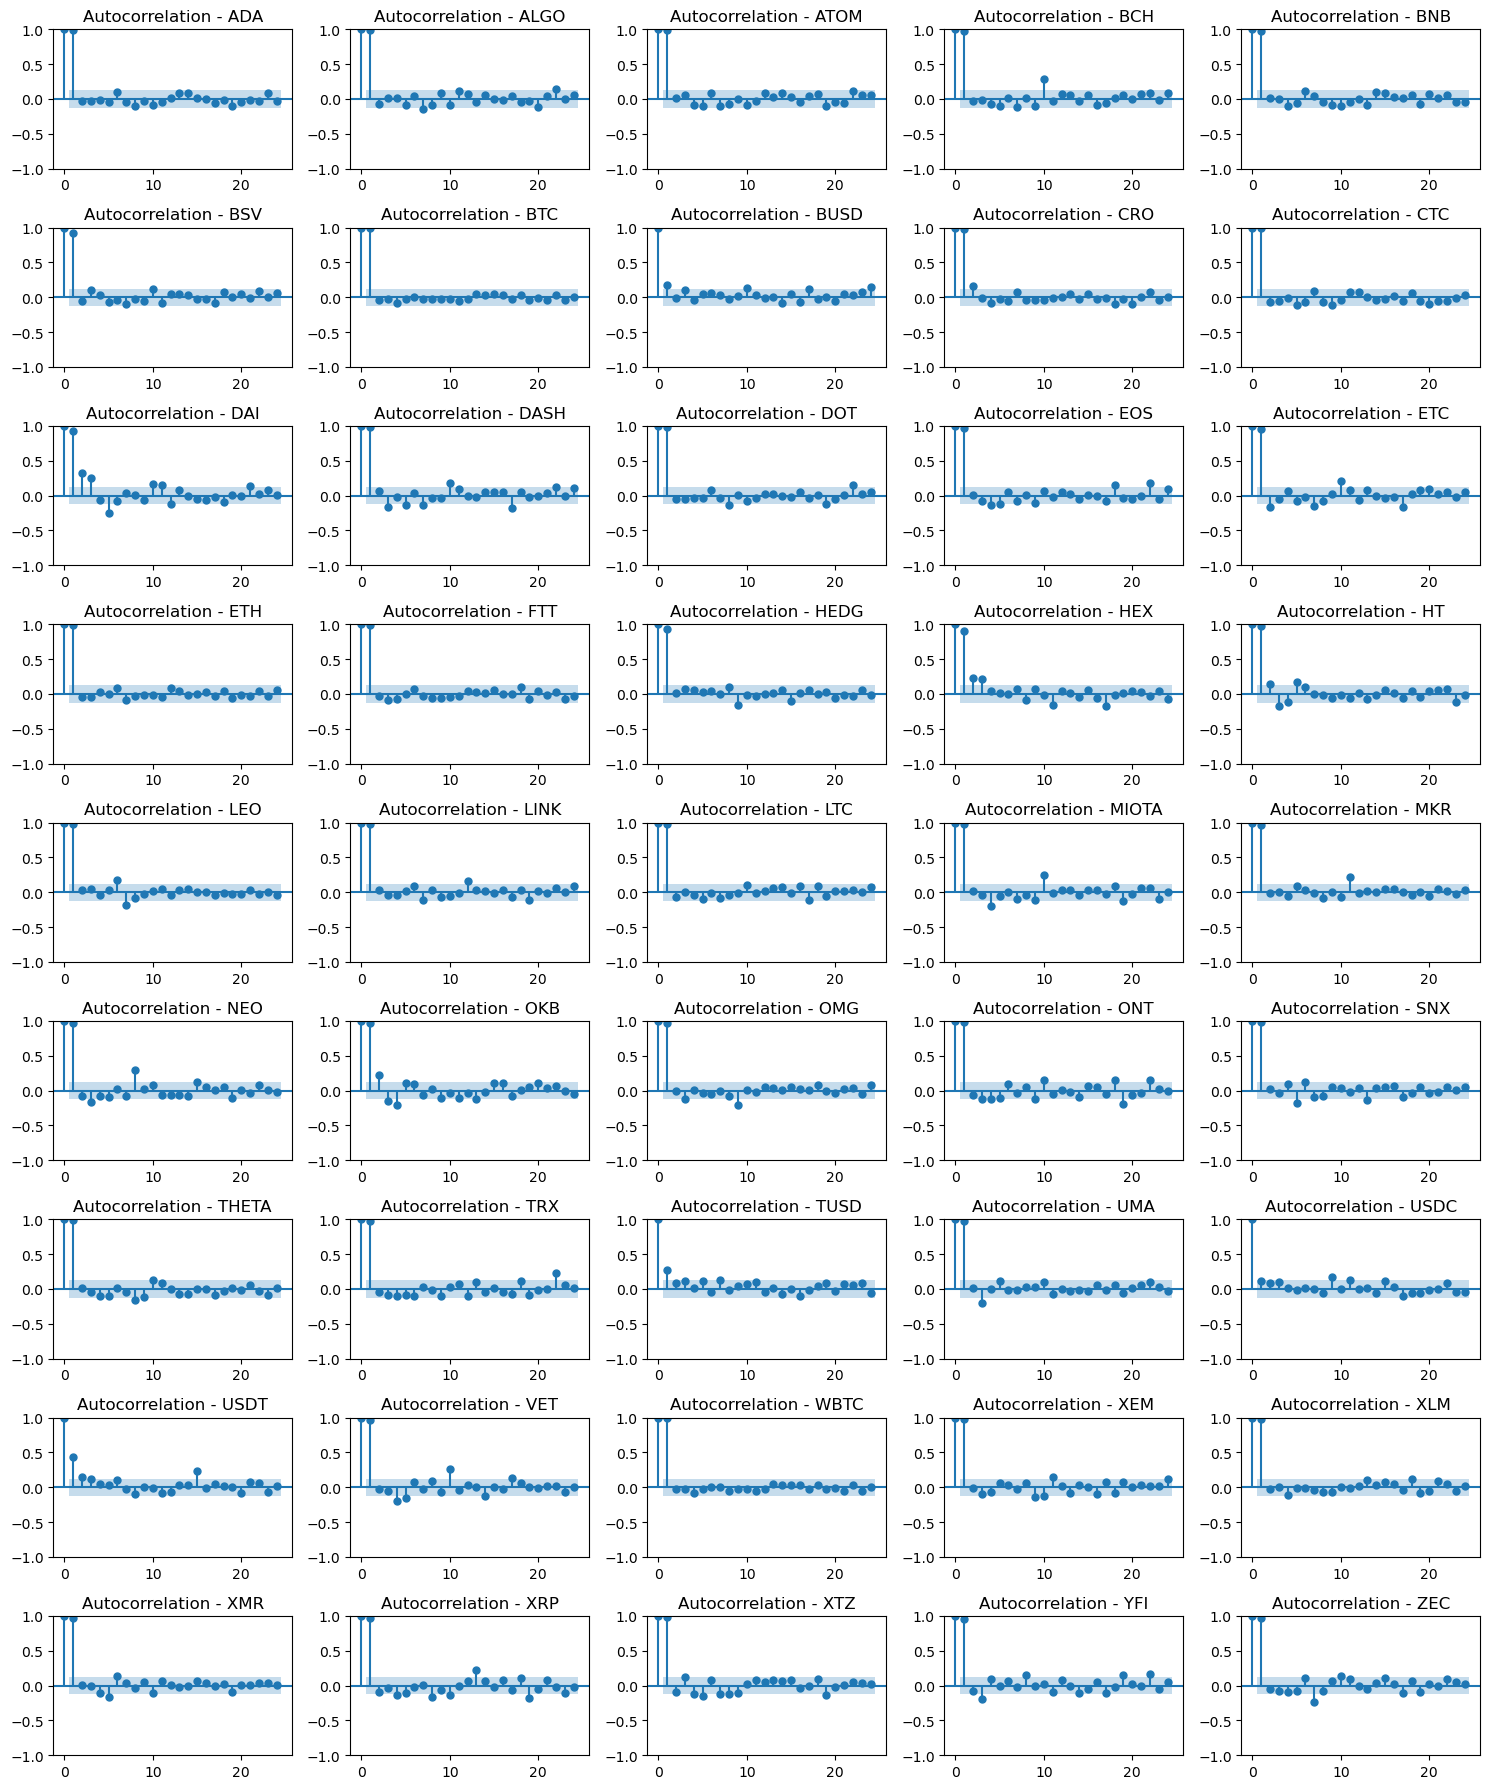

In [15]:
plot_pacfs(df, coins, 9,5)